In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Data for ploting
          
df_train = pd.read_csv('/content/drive/My Drive/airbnb-recruiting-new-user-bookings/train_users_2.csv')
df_test = pd.read_csv('/content/drive/My Drive/airbnb-recruiting-new-user-bookings/test_users.csv')

In [0]:
df_eda = df_train.sample(50000, random_state=1)
plt.style.use('seaborn')

sns.set(rc={'figure.figsize':(100,10)})
%matplotlib inline

In [0]:
def showDefaultGraph(parameter, data = df_eda):
  sns.countplot(x=parameter, data=data)

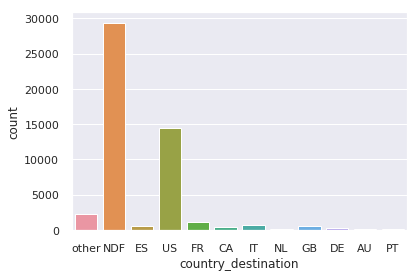

In [6]:
#전체 country_destination 분포
showDefaultGraph("country_destination")

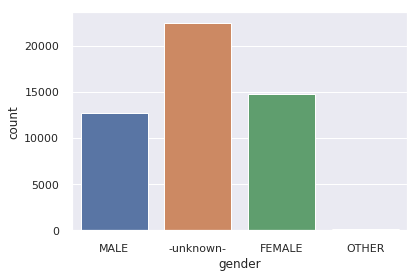

In [7]:
#전체 gender 분포
showDefaultGraph("gender")

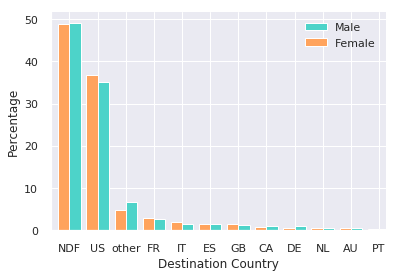

In [8]:
#country 별 gender
women = sum(df_eda['gender'] == 'FEMALE')
men = sum(df_eda['gender'] == 'MALE')

female_destinations = df_eda.loc[df_eda['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = df_eda.loc[df_eda['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

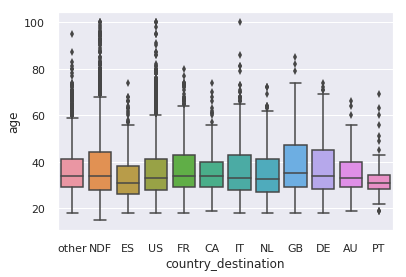

In [9]:
#country 별 age
age_temp = df_eda.copy()
age_temp[ age_temp['age'] > 100] = np.nan
age_temp[ age_temp['age'] < 14] = np.nan
sns.boxplot(x=age_temp.country_destination, y=age_temp.age, data=age_temp)
plt.show()

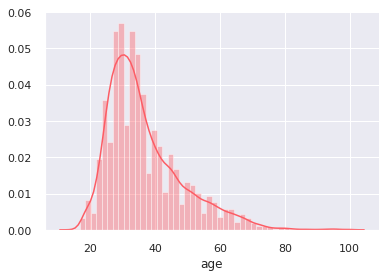

In [10]:
sns.distplot(age_temp.age.dropna(), color='#FD5C64')
sns.despine()

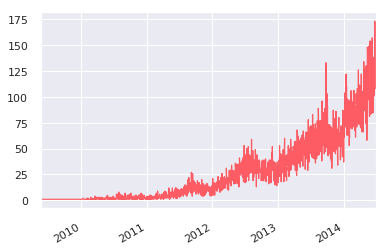

In [11]:
# date_account_created
pd.to_datetime((df_eda.timestamp_first_active // 1000000), format='%Y%m%d').value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')

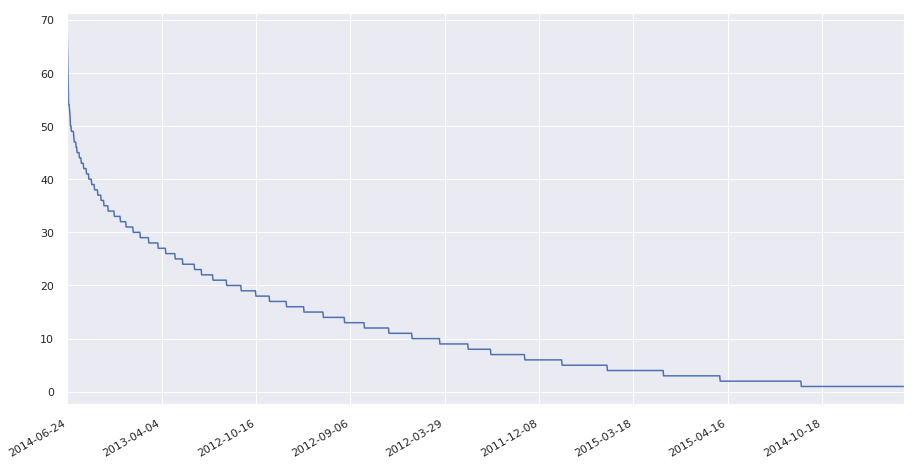

In [12]:
# date_first_booking
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
df_eda['date_first_booking'].value_counts().plot(kind='line', ax=axes)
fig.autofmt_xdate()
plt.show()

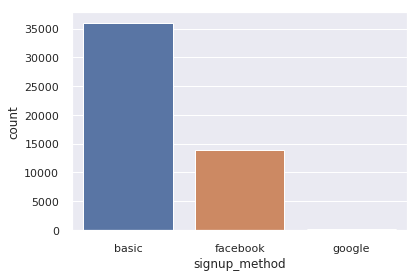

In [13]:
#전체 sign up method 분포
showDefaultGraph("signup_method")

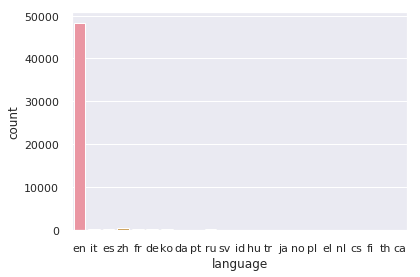

In [14]:
#전체 language 분포
showDefaultGraph("language")

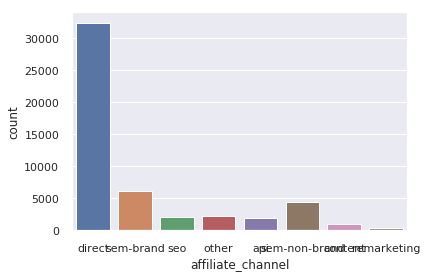

In [15]:
#전체 affiliate_channel 분포
showDefaultGraph("affiliate_channel")

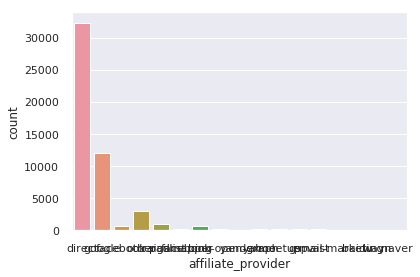

In [16]:
#전체 affiliate_provider 분포
showDefaultGraph("affiliate_provider")

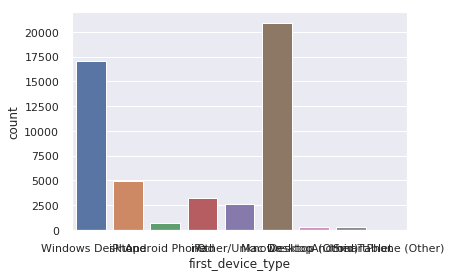

In [17]:
#전체 first_device_type 분포
showDefaultGraph("first_device_type")

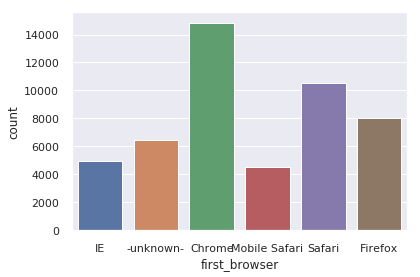

In [18]:
del_list=list(df_eda.first_browser.unique())
del_list.remove('Chrome')
del_list.remove('Safari')
del_list.remove('Firefox')
del_list.remove('IE')
del_list.remove('Mobile Safari')
del_list.remove('-unknown-')
first_browser_temp = df_eda.copy()
first_browser_temp.first_browser.replace(del_list, np.nan, inplace=True)

#전체 first_browser 분포
showDefaultGraph("first_browser", first_browser_temp)

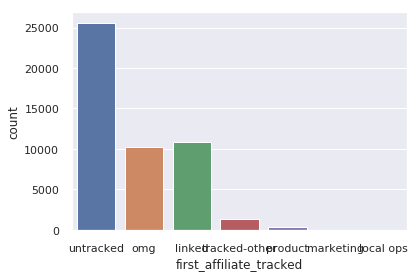

In [19]:
#전체 first_affiliate_tracked 분포
showDefaultGraph("first_affiliate_tracked")

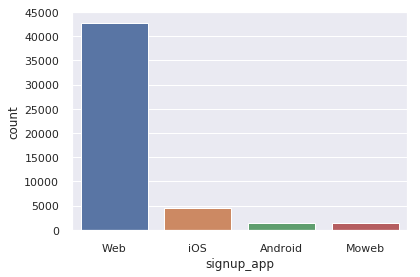

In [20]:
#전체 signup_app 분포
showDefaultGraph("signup_app")